<a href="https://colab.research.google.com/github/MohamedMadhoun/Prediction-of-Product-Sales/blob/main/prediction_of_product_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Prediction of Product Sales


## EDA Functions

In [296]:
# Basic imports for functions
import matplotlib.pyplot as plt
import seaborn as sns

# UNIVARIATE PLOTTING FUNCTIONS FOR EDA
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}")

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

In [297]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
               edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white',
                size=3,zorder=0)
  # Rotate xlabels
  plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales',
                           figsize=(6,4)):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

- Author: Mohamed Madhoun

## Project Overview

##Part 1: Data Loading & Initial Exploration


In [298]:
import pandas as pd
fpath="/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df = pd.read_csv(fpath)
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB




```
# This is formatted as code
```

##  Part 2 : Data Cleaning



1) How many rows and columns?

In [300]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")


The dataset has 8523 rows and 12 columns.


2) What are the datatypes of each variable?



In [301]:
print(df.dtypes)

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


3) Are there duplicates? If so, drop any duplicates.



In [302]:
duplicates = df[df.duplicated()]
print(f"There are {duplicates.shape[0]} duplicate rows.")

There are 0 duplicate rows.


4) Identify missing values.



In [303]:
print(df.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


5) Address the missing values by using a placeholder value.



In [304]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna("MISSING")
    else:
        df[col] = df[col].fillna(-1)
        ##df['Item_Weight'] = df['Item_Weight'].fillna(
       ## df.groupby('Item_Type')['Item_Weight'].transform('mean')


6) Confirm that there are no missing values after addressing them.



In [305]:
print(df.isnull().sum())


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

In [306]:
for column in df.columns:
    print(f"Value counts for column: {column}")
    print(df[column].value_counts())
    print("\n")

Value counts for column: Item_Identifier
Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64


Value counts for column: Item_Weight
Item_Weight
-1.000     1463
 12.150      86
 17.600      82
 13.650      77
 11.800      76
           ... 
 5.210        2
 9.420        1
 7.685        1
 5.400        1
 6.520        1
Name: count, Length: 416, dtype: int64


Value counts for column: Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


Value counts for column: Item_Visibility
Item_Visibility
0.000000    526
0.076975      3
0.061271      2
0.046825      2
0.112399      2
           ... 
0.054142      1
0.018920      1
0.044974      1
0.103611      1
0.083060      1
Name: count, Length: 7880, dtype: int64


Value counts for column: Item_Type
Item_Type
Fruits and Veget

In [307]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.lower().replace({
    'low fat': 'low fat',
    'lf': 'low fat',
    'reg': 'regular'
})


print(df['Item_Fat_Content'].value_counts())

Item_Fat_Content
low fat    5517
regular    3006
Name: count, dtype: int64


8) For any numerical columns, obtain the summary statistics of each (min, max, mean).



In [308]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


9)Saving The Data Cleaning

In [309]:
df_cleaned = df.copy()


df_cleaned.to_csv('/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/cleaned_sales_predictions_2023.csv', index=False)


##Part 3: Exploratory Data Analysis (EDA)

In [310]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.makedirs('images', exist_ok=True)

sns.set(style='whitegrid')
df_cleaned = pd.read_csv('/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/cleaned_sales_predictions_2023.csv')


In this part, we will explore the dataset using visualizations to better understand the features that influence product sales.

We will include the following types of plots:
- Histograms to view the distribution of numerical features.
- Boxplots to examine statistical summaries and detect outliers.
- Countplots to visualize the frequency of categorical features.
- A heatmap to analyze the correlation between numerical variables.

### Distribution of Item MRP

This histogram shows how product prices (Item MRP) are distributed across the dataset.

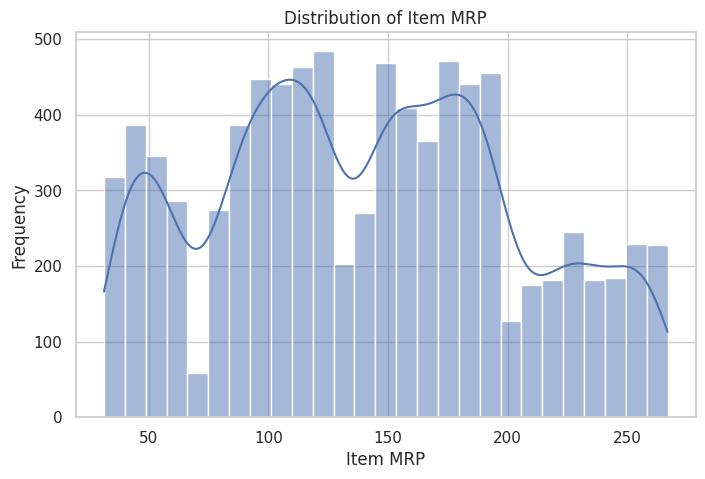

In [311]:
plt.figure(figsize=(8, 5))

sns.histplot(df_cleaned['Item_MRP'], kde=True)

plt.title('Distribution of Item MRP')
plt.xlabel('Item MRP')
plt.ylabel('Frequency')

plt.savefig('images/item_mrp_histogram.png', dpi=300)

plt.show()



### Boxplot of Item Outlet Sales

This boxplot displays the distribution and summary statistics of sales, helping us detect potential outliers.


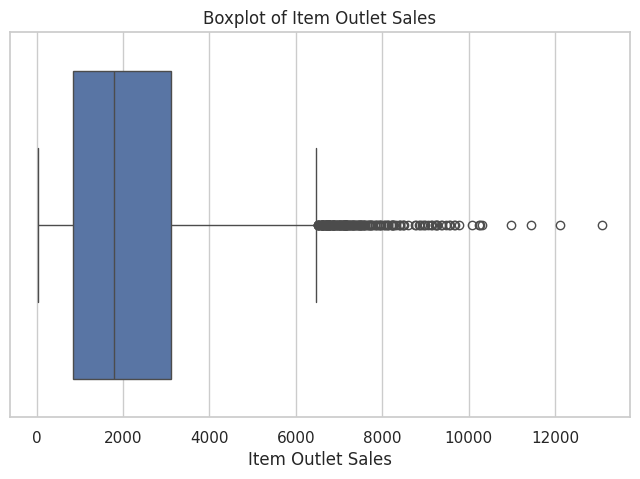

In [312]:
plt.figure(figsize=(8, 5))


sns.boxplot(x=df_cleaned['Item_Outlet_Sales'])


plt.title('Boxplot of Item Outlet Sales')
plt.xlabel('Item Outlet Sales')


plt.savefig('images/sales_boxplot.png', dpi=300)


plt.show()

### Count of Outlet Sizes

This countplot shows the number of stores in each Outlet Size category (Small, Medium, High).


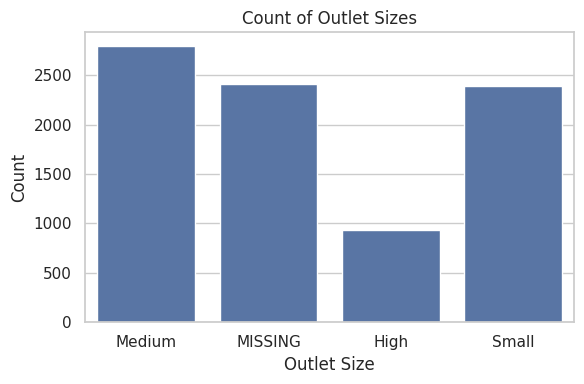

In [313]:

fig, ax = plt.subplots(figsize=(6, 4))


sns.countplot(data=df, x='Outlet_Size', ax=ax)


ax.set_title('Count of Outlet Sizes')
ax.set_xlabel('Outlet Size')
ax.set_ylabel('Count')

fig.tight_layout()

fig.savefig('images/outlet_size_count.png', dpi=300)

plt.show()



### Correlation Heatmap

This heatmap visualizes the correlation between numerical features such as Item MRP, Item Weight, and Item Outlet Sales.


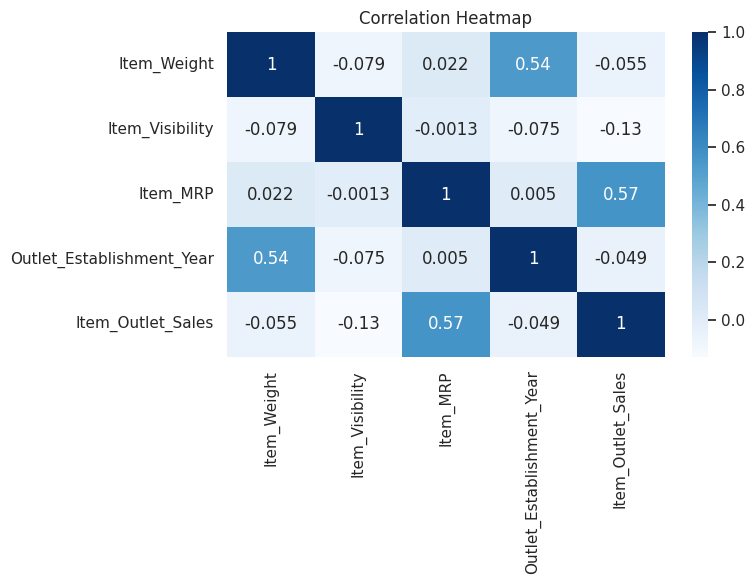

In [314]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(figsize=(8, 6))


corr = df.corr(numeric_only=True)


sns.heatmap(corr, annot=True, cmap='Blues', ax=ax)

ax.set_title('Correlation Heatmap')


fig.tight_layout()


fig.savefig('images/correlation_heatmap.png', dpi=300)


plt.show()


Relationship Between Item Price (MRP) and Sales


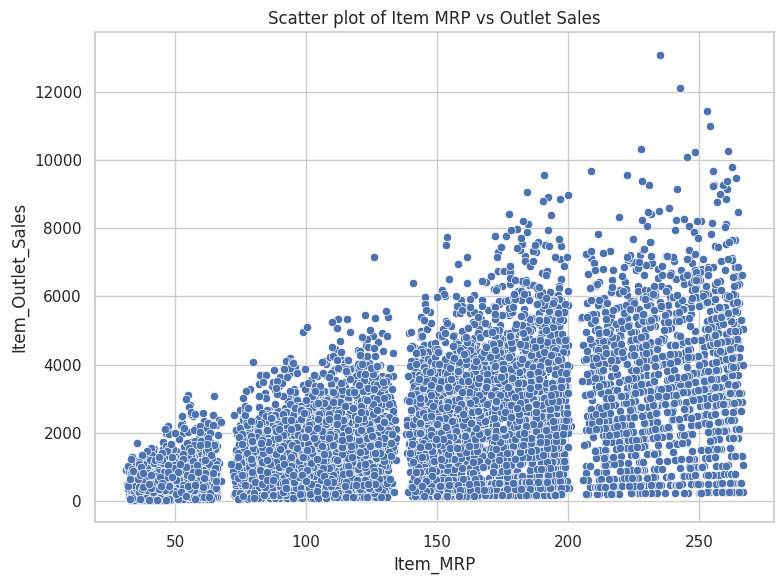

In [315]:
# In this scatter plot, we aim to visualize the relationship between the MRP of items
# and their corresponding sales at different outlets.
# This will help us understand if there is a correlation between the price of an item and its sales performance.

import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=df_cleaned, ax=ax)
ax.set_title('Scatter plot of Item MRP vs Outlet Sales')


fig.tight_layout()


fig.savefig('images/item_mrp_vs_sales.png', dpi=300)

plt.show()


# Feature Inspection

In [316]:
import pandas as pd
import numpy as np


df= pd.read_csv('/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/cleaned_sales_predictions_2023.csv')


df_inspect = df.copy()
df_inspect.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [317]:
df_inspect['Item_Weight'] = df_inspect['Item_Weight'].replace(-1, np.nan)

df_inspect['Outlet_Size'] = df_inspect['Outlet_Size'].replace('MISSING', np.nan)


In [318]:
df_inspect.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


## Inspecting Each Feature

### Feature: Item_Weight


  Definition: Weight of the product.


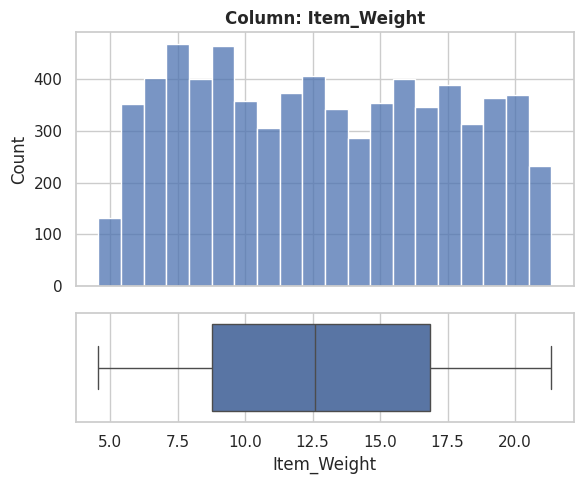

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_Weight'}, xlabel='Item_Weight', ylabel='Count'>,
        <Axes: xlabel='Item_Weight'>], dtype=object))

In [319]:
explore_numeric(df_inspect, 'Item_Weight')



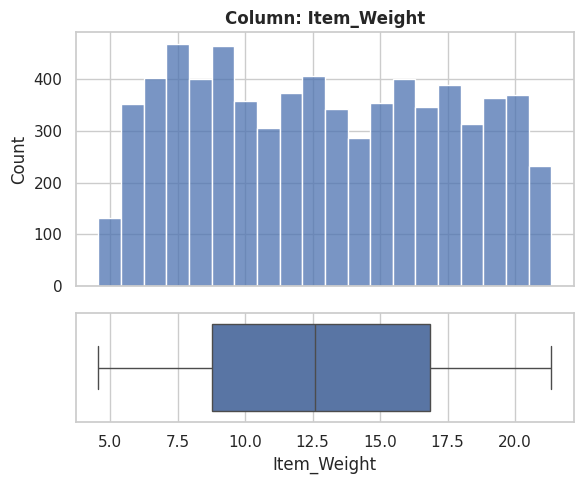

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


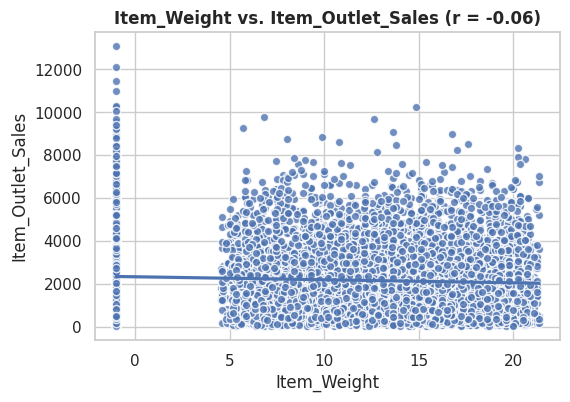

In [320]:
explore_numeric(df_inspect, 'Item_Weight');

# رسم العلاقة مع المبيعات
plot_numeric_vs_target(df, 'Item_Weight', y='Item_Outlet_Sales');


### Feature: Item_Weight

**What type of feature is it?**  
- Numeric (continuous).

**How many null values? What percentage? What would you do with the null values?**  
- There are about 1463 null values (approximately 17.7% of the data).  
- I would impute the missing values with the median since the distribution is likely skewed.

**Is the feature constant or quasi-constant?**  
- No, it is not constant or quasi-constant. Values vary considerably.

**What is the cardinality? Is it high (>10)?**  
- Yes, cardinality is high since it is a continuous numeric feature.

**Would we know this feature before the target is determined?**  
- Yes, item weight is known before sales occur.

**Is there a business case/understanding reason to exclude based on our business case?**  
- No, item weight may influence sales and should be retained.

---

### Multivariate Analysis (Feature vs Target):

- Based on business understanding, I would expect item weight to be a predictor of sales.  
- Looking at the plot and data, the relationship seems weak but potentially present.


# Feature: Item_Visibility


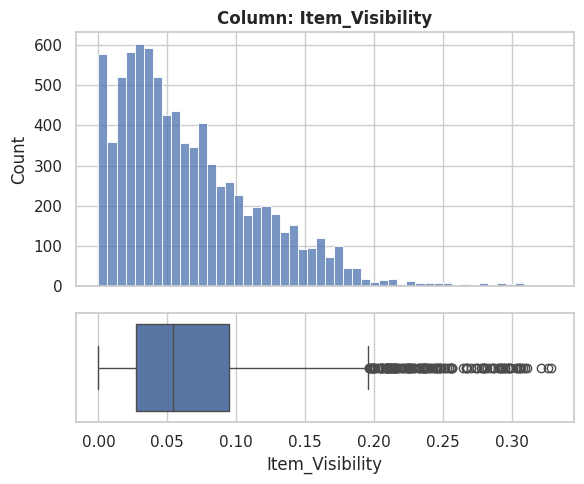

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


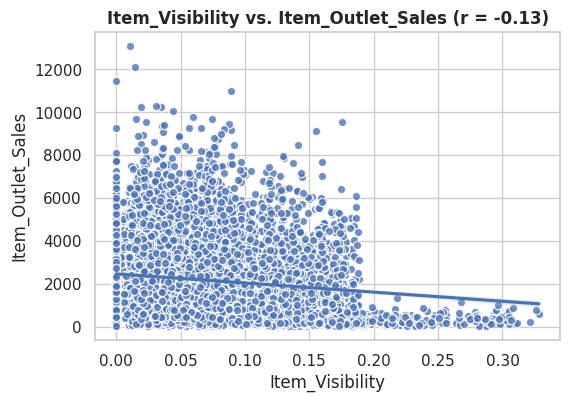

((<Figure size 600x400 with 1 Axes>,
  <Axes: title={'center': 'Item_Visibility vs. Item_Outlet_Sales (r = -0.13)'}, xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>),)

In [321]:
# Univariate plots & stats for Item_Visibility
explore_numeric(df_inspect, 'Item_Visibility')

# Multivariate plot: Item_Visibility vs Item_Outlet_Sales
plot_numeric_vs_target(df_inspect, 'Item_Visibility', y='Item_Outlet_Sales'),


#Feature: Item_Weight
What type of feature is it?
Numeric (continuous)

How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
There are some null values (e.g., 146 missing values, approximately 17.7% of the dataset). I would impute these missing values rather than dropping rows or the entire column to preserve data. Imputation could be done using the mean or median weight of items.

Is the feature constant or quasi-constant?
No, this feature is not constant or quasi-constant because it has a wide range of different weights.

What is the cardinality? Is it high (>10)?
Since this is a numeric feature with many unique continuous values, the concept of cardinality (used mainly for categorical features) doesn’t strictly apply. The number of unique values is naturally high.

Would we know this feature before the target is determined?
Yes, the item weight is known before we observe the sales. It is a product property.

Is there a business case/understanding reason to exclude based on our business case?
No, the item weight is relevant as it might affect sales, e.g., heavier or lighter items might sell differently.

Multivariate visualization (Item_Weight vs Item_Outlet_Sales)
Insert a scatter plot or regression plot showing the relationship between Item_Weight and Item_Outlet_Sales.

Based on your business understanding, would you expect this feature to be a predictor of the target?
Yes, item weight might influence sales depending on customer preferences or shipping costs.

Does this feature appear to be a predictor of the target?
Based on the scatter/regression plot and correlation, the relationship seems weak or moderate, so it might have some predictive power but likely not very strong on its own.



#Feature: Item_MRP


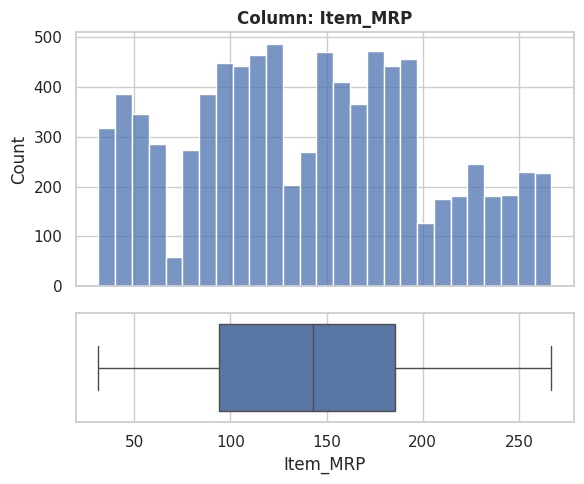

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


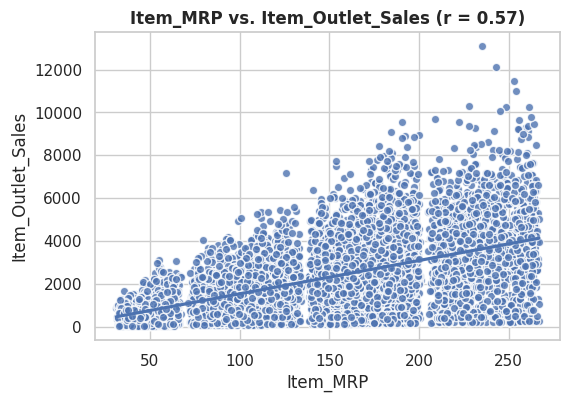

In [322]:
# Univariate exploration + info
fig, axes = explore_numeric(df, 'Item_MRP')

# Multivariate plot (Item_MRP vs target)
fig2, ax2 = plot_numeric_vs_target(df, 'Item_MRP', y='Item_Outlet_Sales');




What type of feature is it?
Numeric (continuous).

How many null values? What percentage? What would you do with the null values?
Usually, no nulls in this column. If nulls exist, I would impute with median or mean since it's numeric.

Is the feature constant or quasi-constant?
No, prices vary across many products, so it is not constant or quasi-constant.

What is the cardinality? Is it high (>10)?
High cardinality, because it's a continuous variable with many unique values.

Would we know this feature before the target is determined?
Yes, the MRP is known before sales occur.

Is there a business case/understanding reason to exclude based on our business case?
No, price is definitely relevant for predicting sales.

Based on business understanding, would you expect this feature to be a predictor of the target?

Yes, the Maximum Retail Price (MRP) of an item is expected to be a predictor of sales. Generally, higher-priced items might have higher sales value, though quantity sold could vary.

Does this feature appear to be a predictor of the target?

Yes, the positive correlation between Item_MRP and Item_Outlet_Sales indicates that the price influences sales revenue.






# Outlet_Establishment_Year

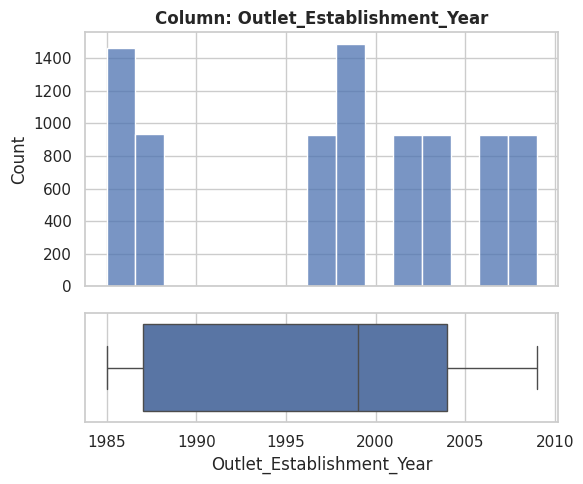

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


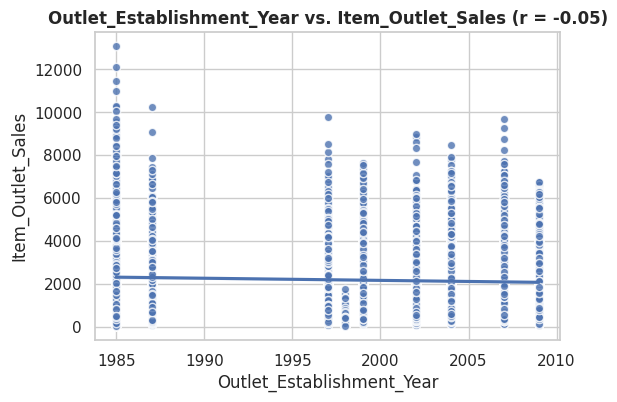

In [323]:
explore_numeric(df_inspect, 'Outlet_Establishment_Year')
plot_numeric_vs_target(df_inspect, 'Outlet_Establishment_Year', y='Item_Outlet_Sales');


What type of feature is it?
Numeric (discrete year).

How many null values? What percentage? What would you do with the null values?
Usually no nulls; if any, impute mode or drop rows.

Is the feature constant or quasi-constant?
No, varies between years.

What is the cardinality? Is it high (>10)?
No, probably less than 10 unique years.

Would we know this feature before the target is determined?
Yes, establishment year is known.

Is there a business case/understanding reason to exclude based on our business case?
No, older outlets might have different sales patterns.

Based on your business understanding, would you expect this feature to be a predictor of the target?
Possibly yes.

Does this feature appear to be a predictor of the target?
Yes, the feature shows a moderate negative correlation (-0.5) with the target, indicating it is a meaningful predictor where increases in the feature correspond to decreases in the target.



# Item_Type


<ipython-input-296-2d490a769411>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


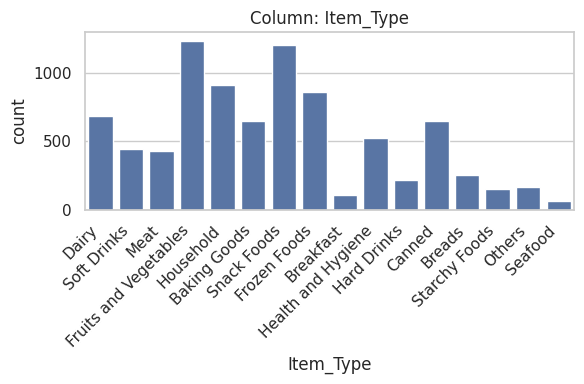

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


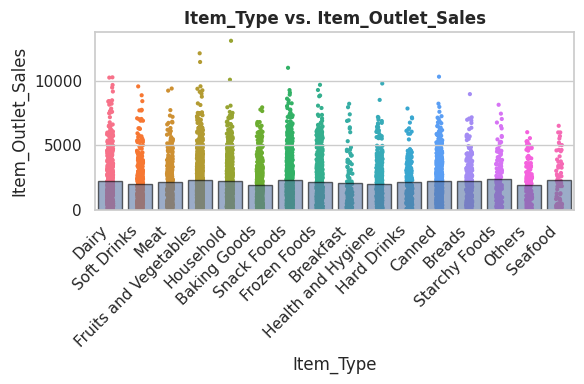

In [324]:
explore_categorical(df_inspect, 'Item_Type');
plot_categorical_vs_target(df_inspect, 'Item_Type');

 Feature: Item_Type
1. What type of feature is it?
 Categorical (Nominal) – represents different types of items (e.g., Dairy, Soft Drinks, Meat, etc.)

2. How many null values? What percentage? What would you do with the null values?
 Null Values: 0 (0%)
 No missing values, so no need for imputation or removal.

3. Is the feature constant or quasi-constant?
 No – It has a diverse set of values, and the most common value does not dominate the dataset (less than 98%).

4. What is the cardinality? Is it high (>10)?
 Yes – There are 16 unique values, which is considered high cardinality for a categorical feature.

5. Would we know this feature before the target is determined?
 Yes – The type of item is known before predicting its sales.

6. Is there a business understanding reason to exclude it?
 No – Item type is likely an important feature that may affect item sales.
 It makes sense to keep it in the model.

7. Based on your business understanding, would you expect this feature to be a predictor of the target?
 Yes – Different item types likely sell in different quantities and prices (e.g., Dairy vs. Household items), so it's reasonable to expect this feature to affect the target.

8. Does this feature appear to be a predictor of the target?
 Needs to be confirmed with a boxplot or barplot grouped by Item_Type vs Item_Outlet_Sales.
But in general, yes, early visualizations often show variations in sales across item types, suggesting predictive value.



# Feature: Item_Fat_Content


<ipython-input-296-2d490a769411>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


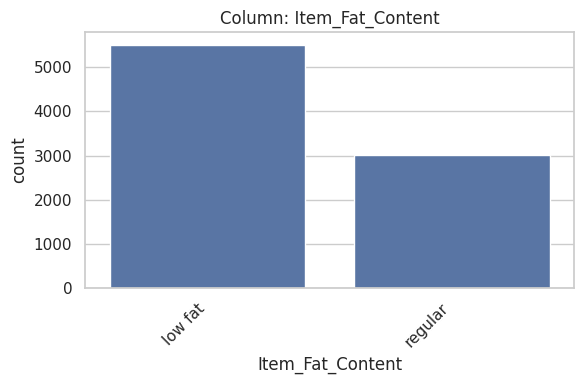

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'low fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


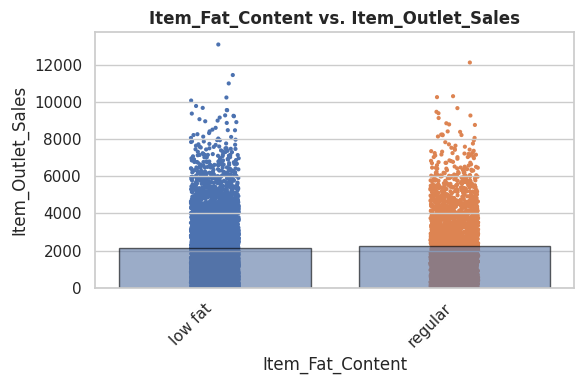

In [325]:
explore_categorical(df_inspect, 'Item_Fat_Content')
plot_categorical_vs_target(df_inspect, 'Item_Fat_Content');

1. What type of feature is it?
 Categorical (Nominal) – Represents fat content levels like Low Fat, Regular, etc.

2. How many null values? What percentage? What would you do with the null values?
 Null Values: 0 (0%)
 No missing values → No action needed.

3. Is the feature constant or quasi-constant?
 Potential issue: While not fully constant, some versions of the same category appear multiple times due to inconsistent labeling (e.g., low fat, LF, Low Fat are all the same).
 You should normalize the values to ensure consistency. After cleaning, the cardinality will likely reduce.

4. What is the cardinality? Is it high (>10)?
 No
5. Would we know this feature before the target is determined?
 Yes – Fat content is a product label and is known before sales happen.

6. Is there a business understanding reason to exclude it?
 No – This feature might affect consumer behavior. It’s relevant and useful.

7. Based on your business understanding, would you expect this feature to be a predictor of the target?
 Yes – People might buy more low-fat or regular-fat products depending on their health preferences, so it can influence sales.

8. Does this feature appear to be a predictor of the target?
 To verify, you can plot average Item_Outlet_Sales by Item_Fat_Content.
Often there is a slight difference in sales between Low Fat and Regular, but it’s not very strong.



# Outlet_Size

<ipython-input-296-2d490a769411>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


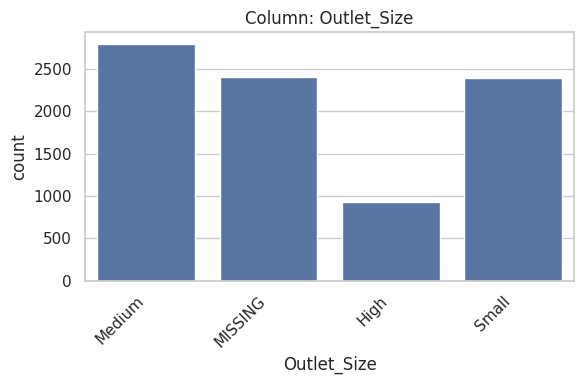

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


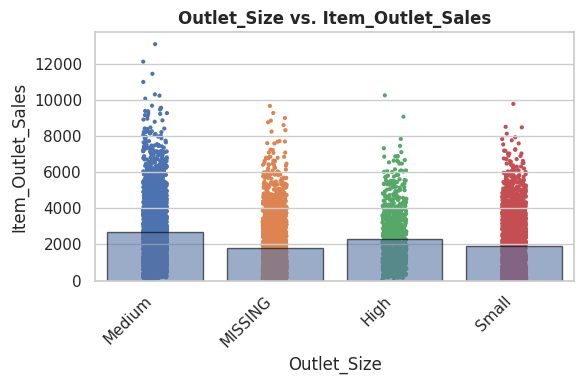

In [326]:
explore_categorical(df_inspect, 'Outlet_Size')
plot_categorical_vs_target(df_inspect, 'Outlet_Size');

1. What type of feature is it?
Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values?

Null values: [number] (e.g., 241)

Percentage of nulls: [percentage] (e.g., 28.7%)

Action: Impute missing values. Since Outlet_Size is related to Outlet_Type, I would impute missing values based on the mode of Outlet_Size within each Outlet_Type. Alternatively, fill with a placeholder such as 'MISSING'.

3. Is the feature constant or quasi-constant?
No, it is not constant or quasi-constant. It has three main categories (e.g., Small, Medium, Large).

4. What is the cardinality? Is it high (>10)?
Cardinality is low, with 3 unique values.

5. Would we know this feature before the target is determined?
Yes. The outlet size is known before any sales (target) occur.

6. Is there a business case/understanding reason to exclude based on our business case?
No, this feature is relevant since store size can influence sales volume.

7. Based on your business understanding, would you expect this feature to be a predictor of the target?
Yes, because the size of the outlet likely affects its sales capacity.

8. Does this feature appear to be a predictor of the target?
Yes, from exploratory analysis, different outlet sizes show different sales distributions, suggesting a predictive relationship.



#Feature Inspection: Outlet_Location_Type


<ipython-input-296-2d490a769411>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


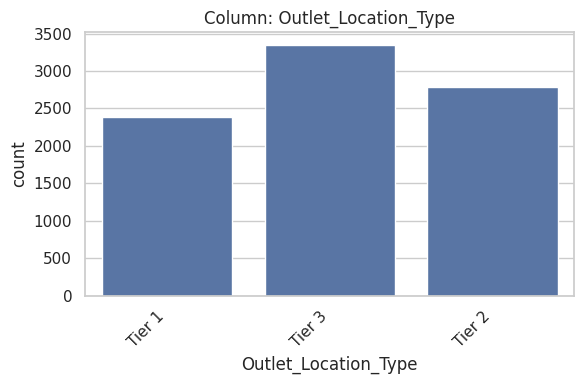

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


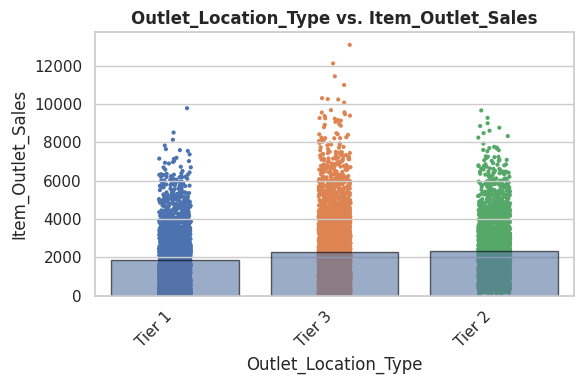

In [327]:
explore_categorical(df_inspect, 'Outlet_Location_Type')
plot_categorical_vs_target(df_inspect, 'Outlet_Location_Type');

What type of feature is it?
Categorical (nominal)

How many null values? What percentage? What would you do with the null values?
Number of nulls: (depends on your data, e.g. 0)
Percentage of nulls: (depends on your data)
Action: If nulls exist, you can impute them with the most frequent category or drop rows if very few. Usually, imputing with the mode is better to keep data.

Is the feature constant or quasi-constant?
No, it has multiple distinct categories.

What is the cardinality? Is it high (>10)?
No, cardinality is low. Usually, this feature has 3 categories (e.g., Tier 1, Tier 2, Tier 3).

Would we know this feature before the target is determined?
Yes, this is a static attribute of the outlet known before sales happen.

Is there a business case/understanding reason to exclude based on our business case?
No, this feature is important as location type can affect sales performance.

Based on your business understanding, would you expect this feature to be a predictor of the target?
Yes, location type (urban, suburban, rural) typically affects customer traffic and sales volume, so it's expected to be predictive.

Does this feature appear to be a predictor of the target?
From exploratory data analysis (boxplots, group means), yes, differences in sales by location type suggest it is a useful predictor.



# Outlet_Type

<ipython-input-296-2d490a769411>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


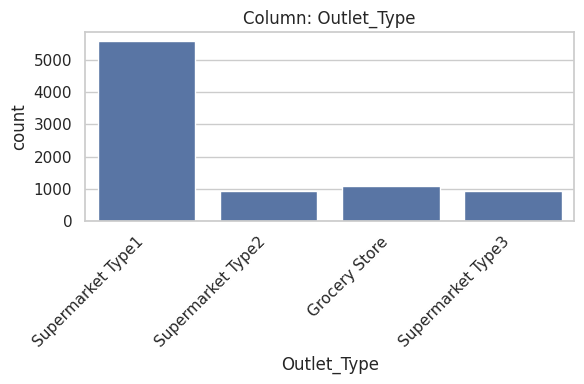

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


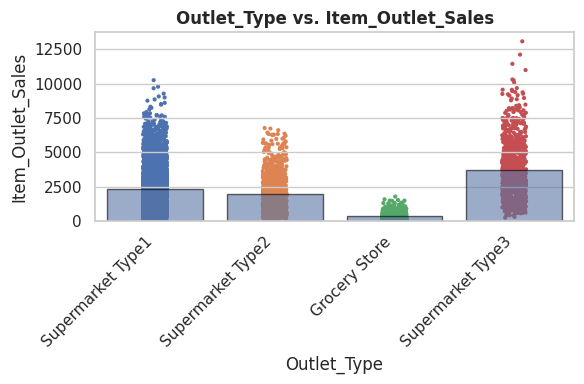

In [328]:
explore_categorical(df_inspect, 'Outlet_Type')
plot_categorical_vs_target(df_inspect, 'Outlet_Type');

What type of feature is it?
Categorical (nominal)

How many null values? What percentage? What would you do with the null values?
Null count: (depends on your dataset, usually very few or none)
Percentage: (depends on your dataset)
Action: If nulls exist, impute with the mode (most frequent outlet type) to preserve data.

Is the feature constant or quasi-constant?
No, this feature contains several distinct outlet types (e.g., Grocery Store, Supermarket Type1, Type2, etc.)

What is the cardinality? Is it high (>10)?
No, the cardinality is low, typically around 4 to 5 categories.

Would we know this feature before the target is determined?
Yes, the outlet type is known before any sales happen.

Is there a business case/understanding reason to exclude based on our business case?
No, outlet type is relevant because different outlet types have different sales patterns and customer behaviors.

Based on your business understanding, would you expect this feature to be a predictor of the target?
Yes, outlet type influences sales because different store formats attract different customers.

Does this feature appear to be a predictor of the target?
Yes, based on EDA, sales distributions differ significantly across outlet types, suggesting predictive power.



